In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv("/kaggle/input/placement/placement.csv")
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123,1
1,1,5.9,106,0
2,2,5.3,121,0
3,3,7.4,132,1
4,4,5.8,142,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    int64  
 3   placement   100 non-null    int64  
dtypes: float64(1), int64(3)
memory usage: 3.2 KB


In [5]:
df.shape

(100, 4)

In [7]:
df.iloc[:,1:]

,cgpa,iq,placement
0,6.8,123,1
1,5.9,106,0
2,5.3,121,0
3,7.4,132,1
4,5.8,142,0
...,...,...,...
95,4.3,200,0
96,4.4,42,0
97,6.7,182,1
98,6.3,103,1


In [ ]:
#Steps we have to do
#1-Preprocess+EDA+feature selection 
#2-Extract input and output
#3-Scale the value 
#4-Train test split
#5-Train the model
#6-Evalute the model
#7-Deploy the model




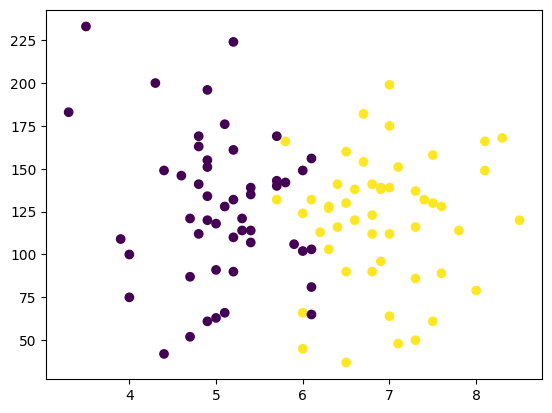

In [8]:
import matplotlib.pyplot as plt
plt.scatter(df['cgpa'],df['iq'],c=df['placement'])

In [9]:
x=df.iloc[:,0:2]
y=df.iloc[:,-1]

In [10]:
x

,Unnamed: 0,cgpa
0,0,6.8
1,1,5.9
2,2,5.3
3,3,7.4
4,4,5.8
...,...,...
95,95,4.3
96,96,4.4
97,97,6.7
98,98,6.3


In [11]:
y

0     1
1     0
2     0
3     1
4     0
     ..
95    0
96    0
97    1
98    1
99    1
Name: placement, Length: 100, dtype: int64

In [16]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1)

In [17]:
x_train

,Unnamed: 0,cgpa
34,34,4.8
50,50,3.5
99,99,6.2
87,87,5.7
14,14,6.1
...,...,...
52,52,7.0
78,78,6.1
32,32,7.0
76,76,4.9


In [18]:
y_train

34    0
50    0
99    1
87    1
14    0
     ..
52    1
78    0
32    1
76    0
96    0
Name: placement, Length: 90, dtype: int64

In [19]:
x_test

,Unnamed: 0,cgpa
80,80,4.9
58,58,8.0
61,61,7.3
28,28,5.2
90,90,7.3
35,35,6.8
30,30,7.6
92,92,5.2
29,29,7.0
81,81,5.4


In [20]:
y_test

80    0
58    1
61    1
28    0
90    1
35    1
30    1
92    0
29    1
81    0
Name: placement, dtype: int64

In [21]:
from sklearn.preprocessing import StandardScaler 

In [22]:
scaler=StandardScaler()

In [23]:
x_train=scaler.fit_transform(x_train)

In [24]:
x_train

array([[-0.49873695, -1.00780177],
       [ 0.05117209, -2.15929403],
       [ 1.73526852,  0.23226681],
       [ 1.32283674, -0.21061482],
       [-1.18612324,  0.14369049],
       [ 0.5323425 ,  0.94087744],
       [ 1.66652989,  0.67514845],
       [-0.12067448,  0.05511416],
       [-0.395629  ,  1.91521704],
       [-0.60184489, -1.80498872],
       [ 0.84166633, -0.91922544],
       [-0.77369147,  0.94087744],
       [-1.46107776, -0.21061482],
       [-1.01427667, -0.65349646],
       [ 0.18864935,  0.40941947],
       [ 0.80729702,  1.20660642],
       [ 0.25738798,  0.14369049],
       [ 0.70418907,  2.26952235],
       [-0.18941311,  0.76372478],
       [-1.59855502, -0.56492013],
       [-1.56418571,  1.29518275],
       [ 0.63545044, -0.83064912],
       [-0.29252106, -0.91922544],
       [ 1.28846743, -0.74207279],
       [-0.36125969,  0.4979958 ],
       [ 0.7729277 ,  0.14369049],
       [ 0.60108113,  0.85230111],
       [ 1.04788222,  0.4979958 ],
       [-0.94553804,

In [25]:
x_test=scaler.transform(x_test)

In [26]:
x_test

array([[ 1.08225154, -0.91922544],
       [ 0.32612661,  1.82664071],
       [ 0.42923455,  1.20660642],
       [-0.70495284, -0.65349646],
       [ 1.42594468,  1.20660642],
       [-0.46436763,  0.76372478],
       [-0.63621421,  1.4723354 ],
       [ 1.49468331, -0.65349646],
       [-0.67058352,  0.94087744],
       [ 1.11662085, -0.47634381]])

In [27]:
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression()

In [30]:
clf.fit(x_train,y_train)

LogisticRegression()

In [31]:
y_pred=clf.predict(x_test)

In [32]:
y_test

80    0
58    1
61    1
28    0
90    1
35    1
30    1
92    0
29    1
81    0
Name: placement, dtype: int64

In [34]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

1.0

<Axes: >

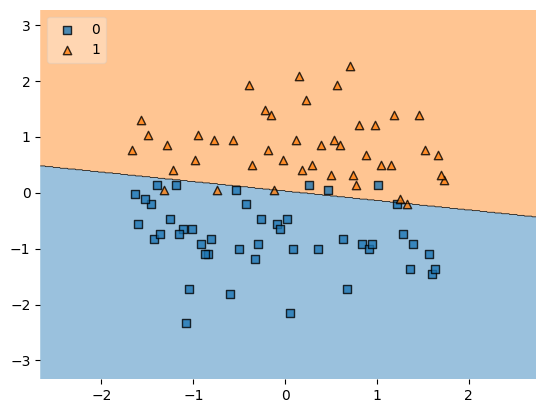

In [35]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(x_train,y_train.values,clf=clf,legend=2)
